<a href="https://colab.research.google.com/github/Kenjiro1/Formacao_IA/blob/main/Projetos_Deep_Learning/Deteccao_Objetos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
MODEL_CONFIG = "MobileNetSSD_deploy.prototxt"
MODEL_WEIGHTS = "MobileNetSSD_deploy.caffemodel"

CLASSES = ["background","aeroplane","bicycle","bird","boat", "bottle", "bus",
           "car", "cat", "chair", "cow", "dinigtable", "dog", "horse", "motorbike", "person",
           "pottedplant","sheep","sofa","train","tvmonitor"]

In [ ]:
net = cv2.dnn.readNetFromCaffe(MODEL_CONFIG,MODEL_WEIGHTS) #Precisa de dois parametros o caminho da configuração e o
# caminho dos pesos

In [ ]:
def detect_person_in_video(video_path):
  cap = cv2.VideoCapture(video_path)
  frame_count = 0
  while True:
    ret, frame = cap.read()
    if not ret:
      print("Fim do vídeo ou erro de leitura")
      break
    frame_count += 1
    (h,w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 0.007843, (300,300), 127.5)
    net.setInput(blob)
    detections = net.forward()

    for i in range(detections.shape[2]):
      confidence = detections[0,0,i,2]
      if confidence > 0.5:
        idx = int(detections[0,0,i,1])
        if CLASSES[idx] == "person":
          box = detections[0,0,i,3:7] * np.array([w,h,w,h])
          (startX, startY, endX, endY) = box.astype("int")

          label  = f"{CLASSES[idx]}: {confidence * 100:.2f}%"
          cv2.rectangle(frame, (startX,startY),(endX, endY),(0,255,0),2)
          cv2.putText(frame, label, (startX, startY-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,255,0),2)
          print(f"Pessoa Detectada no Frame {frame_count}")
          cv2_imshow(frame)

          detected_frame_path = f"detected_frame_{frame_count}.jpg"
          cv2.imwrite(detected_frame_path, frame)
          print(f"Frame salvo como {detected_frame_path}")

          cap.release()
          return "Pessoa detectada no vídeo"
  cap.release()
  return "Nenhuma pessoa detectada no vídeo"


Pessoa Detectada no Frame 90


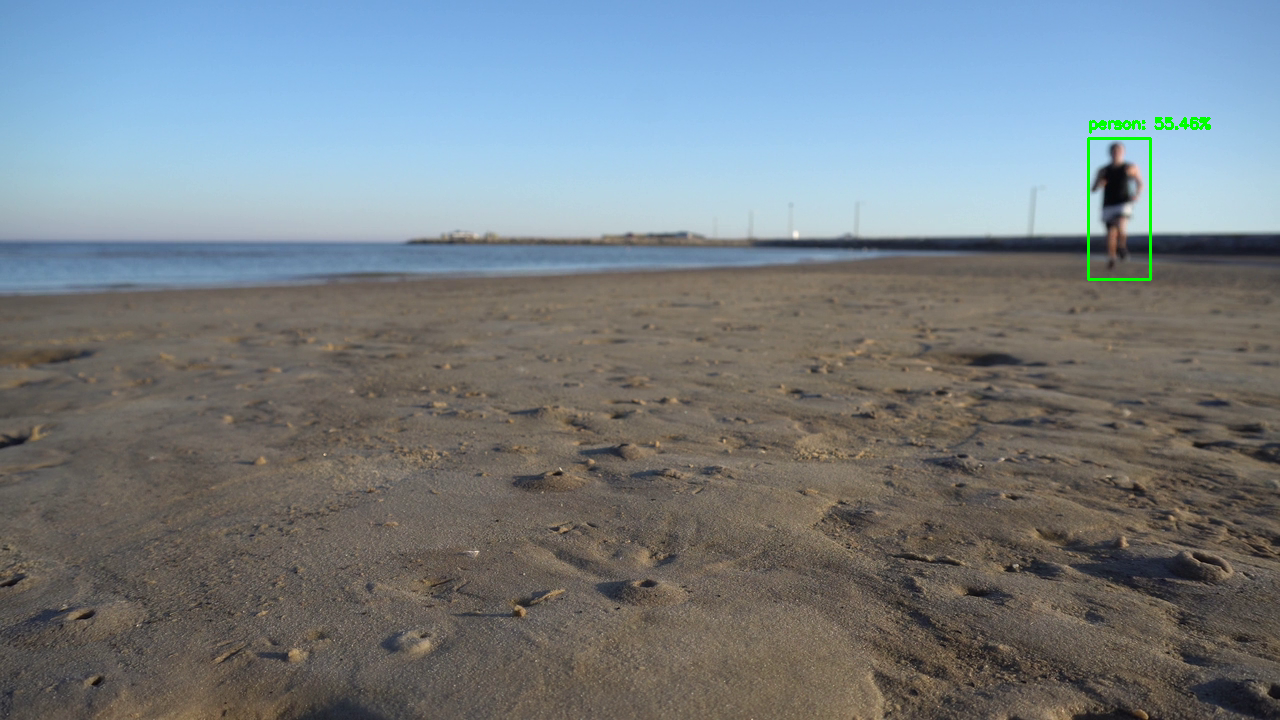

Frame salvo como detected_frame_90.jpg
Pessoa detectada no vídeo


In [ ]:
print(detect_person_in_video("people.mp4"))